In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv("inverse_lansing/0/visor/inverse_lansing.csv", header=None)
q1 = df.iloc[:, 102:]

In [74]:
q1

,102,103,104,105,106,107,108,109,110,111,...,192,193,194,195,196,197,198,199,200,201
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9961,1.0000,...,0.5000,0.500000,0.4686,0.5000,0.500000,0.50000,0.500000,0.5,0.50000,0.500000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,0.5000,0.500000,0.5000,0.4686,0.374500,0.50000,0.500000,0.5,0.43730,0.500000
2,1.0000,0.9961,1.0000,1.0000,1.0000,0.8745,1.0000,1.0000,0.9843,1.0000,...,0.4843,0.500000,0.5000,0.5000,0.500000,0.49220,0.500000,0.5,0.50000,0.496100
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7490,0.9961,1.0000,...,0.5000,0.500000,0.5000,0.5000,0.500000,0.50000,0.500000,0.5,0.50000,0.500000
4,1.0000,0.8745,0.9961,0.9882,1.0000,0.8745,1.0000,1.0000,1.0000,1.0000,...,0.5000,0.492200,0.5000,0.4961,0.484300,0.50000,0.500000,0.5,0.50000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110962,0.9725,0.9882,0.9961,0.8706,0.9922,0.9686,0.9882,0.9882,0.9882,0.9804,...,0.3451,0.007843,0.0000,0.0000,0.013730,0.06275,0.000000,0.0,0.00000,0.064710
110963,0.9725,0.9882,0.9961,0.9961,0.9922,1.0000,0.9882,0.9569,0.9882,0.9961,...,0.3451,0.007843,0.0000,0.0000,0.013730,0.06275,0.007843,0.0,0.01569,0.064710
110964,0.9725,0.9882,0.9961,0.9961,0.9922,1.0000,0.9882,0.9882,0.9882,0.9961,...,0.3451,0.007843,0.0000,0.0000,0.005882,0.06275,0.000000,0.0,0.00000,0.064710
110965,0.9725,0.9882,0.9961,0.9961,0.9922,1.0000,0.9882,0.9882,0.9882,0.9961,...,0.3451,0.007843,0.0000,0.0000,0.076470,0.06275,0.031370,0.0,0.00000,0.001961


,parage,inflage
0,1000,47
1,1000,50
2,1000,38
3,1000,50
4,1000,27
...,...,...
110962,100000,18
110963,100000,21
110964,100000,19
110965,100000,21


In [79]:
data = pd.DataFrame()
data["stage"] = df[0].astype(int)
data["parage"] = df[1].astype(int)
data["inflage"] = q1.T.cumprod().ge(0.5).apply(lambda x: np.argmin(x)) 
# sns.lmplot(data=data, x = "parage", y="inflage")

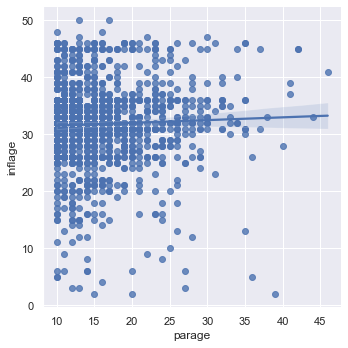

In [84]:
sns.lmplot(data=data[data.stage == 3000], x = "parage", y="inflage")

In [92]:
def si(x,y):
    slope = (len(x) * np.sum(x*y) - np.sum(x) * np.sum(y)) / (len(x)*np.sum(x*x) - np.sum(x) ** 2)
    intercept = (np.sum(y) - slope*np.sum(x)) / len(x)
    return slope, intercept

In [130]:
linreg = pd.DataFrame()
linreg["stage"] = data.stage.unique()
sis = [si(data[data.stage == stage].parage, data[data.stage == stage].inflage) for stage in linreg.stage]

linreg[["slope", "intercept"]] = sis
linreg["number"] = data.groupby('stage').count().parage.tolist()


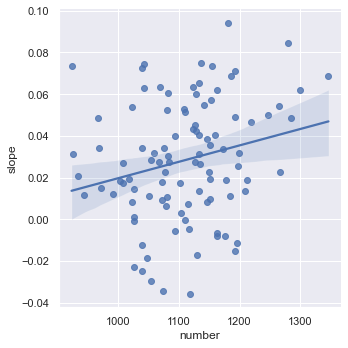

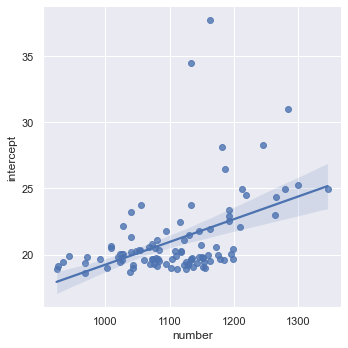

In [135]:
sns.lmplot(linreg, x="number", y="slope")
sns.lmplot(linreg, x="number", y="intercept")

,stage,slope,intercept
0,1000,-0.007954,37.692319
1,2000,0.065336,34.475864
2,3000,0.048649,31.021831
3,4000,0.094309,28.153094
4,5000,0.049932,28.276917
...,...,...,...
95,96000,-0.000844,20.068228
96,97000,0.057019,19.426786
97,98000,0.073691,18.894485
98,99000,0.006268,19.780287


[1163,
 1133,
 1284,
 1181,
 1246,
 1186,
 1346,
 1219,
 1279,
 1300,
 1213,
 1193,
 1266,
 1133,
 1055,
 1264,
 1040,
 1192,
 1193,
 1163,
 1116,
 1209,
 1123,
 1027,
 1146,
 1094,
 1109,
 1073,
 1199,
 1008,
 1130,
 1077,
 1068,
 1172,
 1081,
 1149,
 1083,
 1040,
 1009,
 1159,
 1052,
 1043,
 1134,
 1195,
 968,
 1003,
 1074,
 1163,
 1178,
 927,
 1151,
 1054,
 1123,
 1110,
 1152,
 1126,
 1102,
 1184,
 1039,
 1073,
 1152,
 969,
 1111,
 1094,
 1026,
 1128,
 934,
 1060,
 1129,
 1117,
 1135,
 1198,
 1137,
 1126,
 1076,
 1019,
 1084,
 1081,
 972,
 944,
 1176,
 1103,
 992,
 1048,
 1023,
 1023,
 1142,
 1155,
 1040,
 1069,
 1134,
 1146,
 1043,
 1026,
 1082,
 1027,
 1153,
 924,
 1079,
 1118]

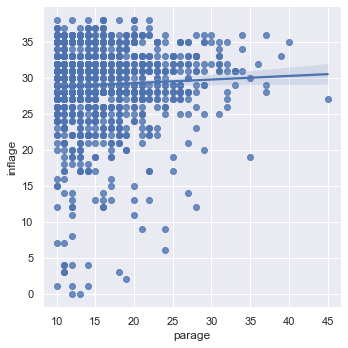

In [122]:
sns.lmplot(x="parage", y="inflage", data=data[data.stage==5000], fit_reg=True)

<AxesSubplot:xlabel='stage', ylabel='intercept'>

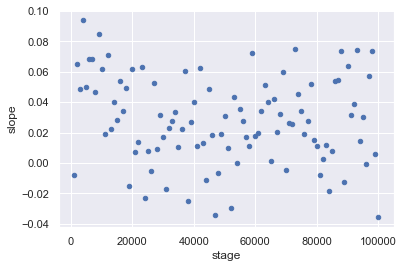

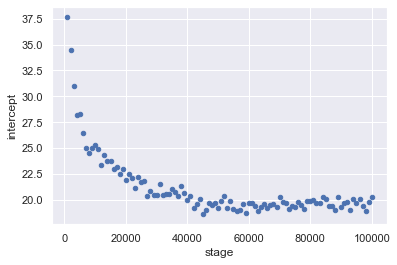

In [104]:
linreg.plot.scatter("stage", "slope")
linreg.plot.scatter("stage", "intercept")

<AxesSubplot:xlabel='parage', ylabel='inflage'>

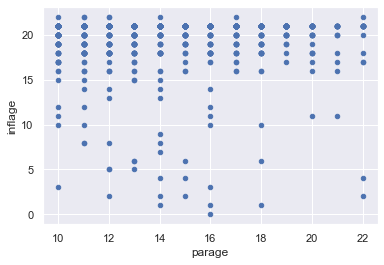

In [114]:
data[data.stage == 100000].plot.scatter("parage", "inflage")

KeyError: "None of [Int64Index([  1000,   2000,   3000,   4000,   5000,   6000,   7000,   8000,\n              9000,  10000,  11000,  12000,  13000,  14000,  15000,  16000,\n             17000,  18000,  19000,  20000,  21000,  22000,  23000,  24000,\n             25000,  26000,  27000,  28000,  29000,  30000,  31000,  32000,\n             33000,  34000,  35000,  36000,  37000,  38000,  39000,  40000,\n             41000,  42000,  43000,  44000,  45000,  46000,  47000,  48000,\n             49000,  50000,  51000,  52000,  53000,  54000,  55000,  56000,\n             57000,  58000,  59000,  60000,  61000,  62000,  63000,  64000,\n             65000,  66000,  67000,  68000,  69000,  70000,  71000,  72000,\n             73000,  74000,  75000,  76000,  77000,  78000,  79000,  80000,\n             81000,  82000,  83000,  84000,  85000,  86000,  87000,  88000,\n             89000,  90000,  91000,  92000,  93000,  94000,  95000,  96000,\n             97000,  98000,  99000, 100000],\n           dtype='int64')] are in the [columns]"

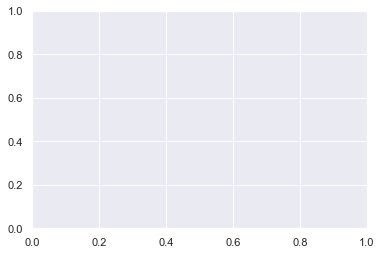

In [101]:
linreg.plot.scatter(linreg.stage, linreg.slope)

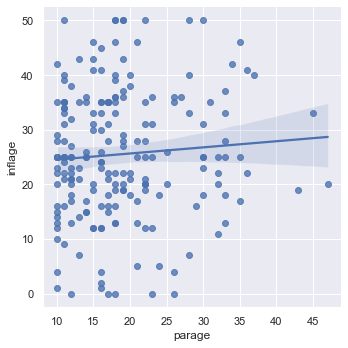

In [63]:
data = pd.DataFrame()
data["parage"] = df[0].astype(int)
data["inflage"] = q1.T.cumprod().ge(0.9).apply(lambda x: np.argmin(x)) 
sns.lmplot(data=data[:200], x = "parage", y="inflage")

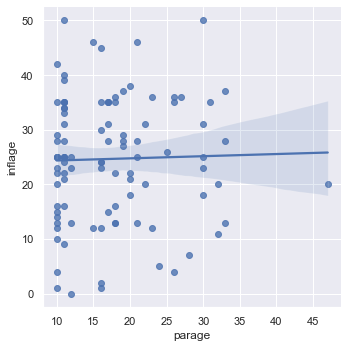

In [57]:
data = pd.DataFrame()
data["parage"] = df[0].astype(int)
data["inflage"] = q1.T.cumprod().ge(0.9).apply(lambda x: np.argmin(x)) 
sns.lmplot(data=data[100:200], x = "parage", y="inflage")

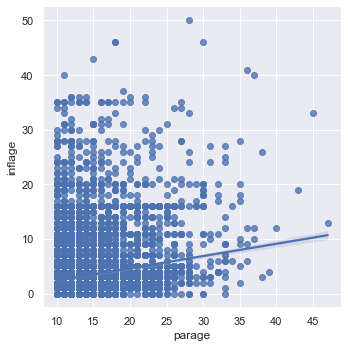

In [53]:
data = pd.DataFrame()
data["parage"] = df[0].astype(int)
data["inflage"] = q1.T.cumprod().ge(0.95).apply(lambda x: np.argmin(x)) 
sns.lmplot(data=data, x = "parage", y="inflage")

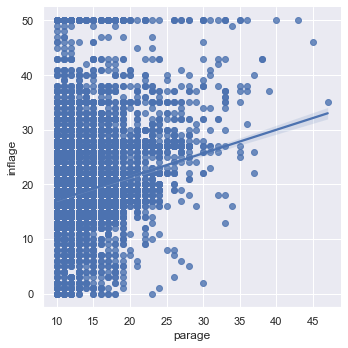

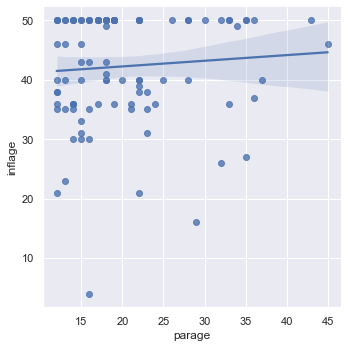

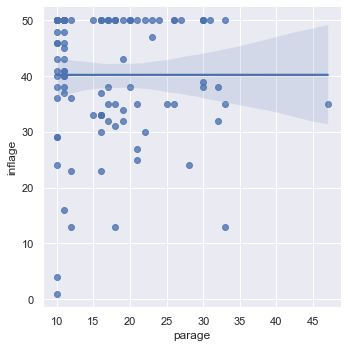

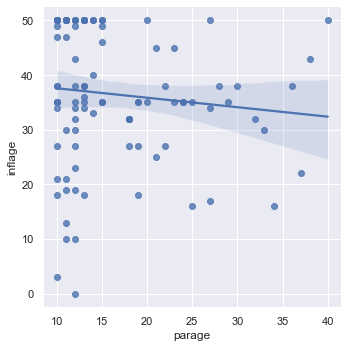

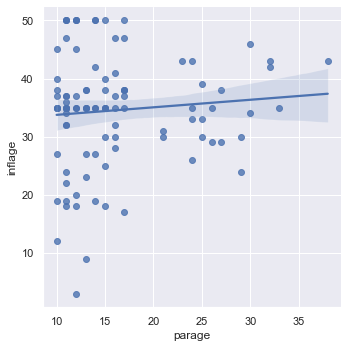

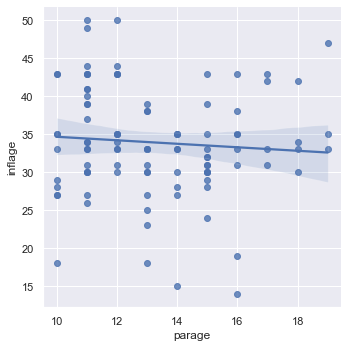

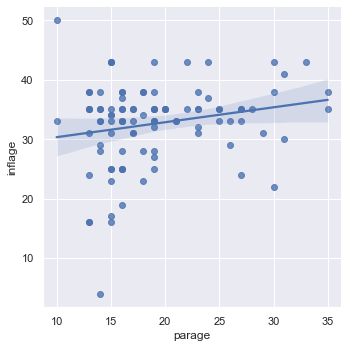

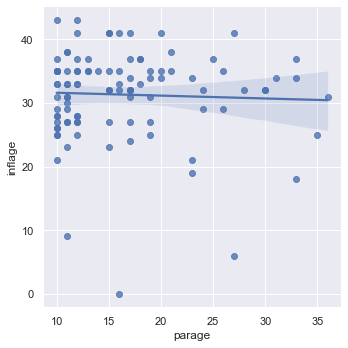

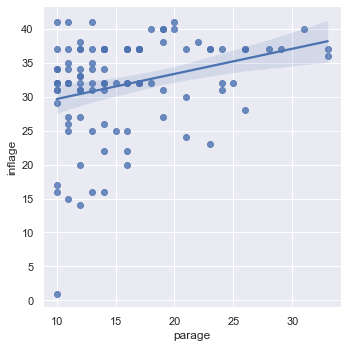

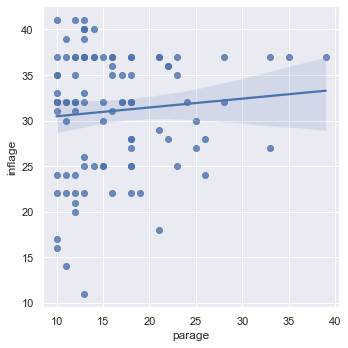

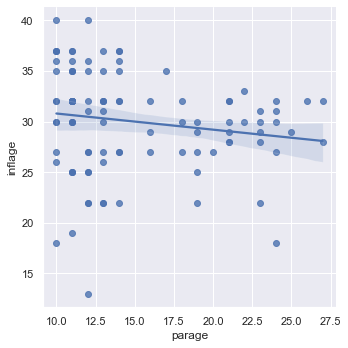

In [49]:
for i in range(10):
    sns.lmplot(data=data[i*100:(i+1)*100], x = "parage", y="inflage")
    plt.show()

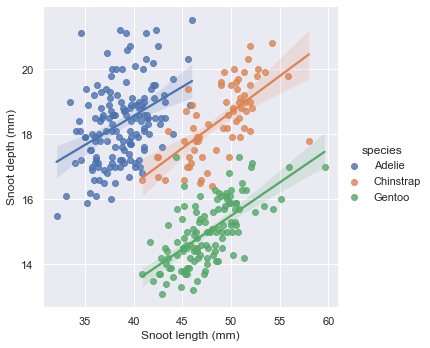

In [13]:
import seaborn as sns
sns.set_theme()

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

(-1.0, 51.0)

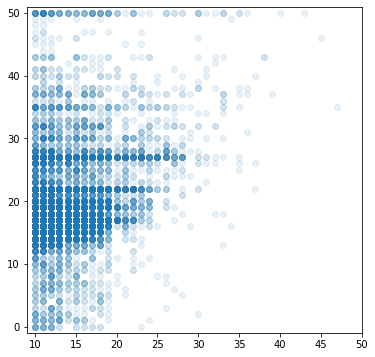

In [11]:

ax.scatter(parage, inflage, alpha=0.1)
plt.xlim(9, 50)
plt.ylim(-1,51)
plt.xlabel(0.)